<a href="https://colab.research.google.com/github/lucarenz1997/NLP/blob/main/Stage_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage 3: Implementing an RAG System for Question Answering

Part 1: Model Training Steps
Objective: Developing and utilizing advanced embedding models to represent the content of Cleantech Media and Google Patent datasets and compare domain-specific embeddings to gain unique insights.

Output: Notebook with annotated model training steps

Data Preparation for Embeddings
Lead: Alvaro Cervan

Preprocessing Steps
The preprocessing steps have already been completed in the previous stage, which include:

Dropping duplicates
Setting data types
Dropping unnecessary columns
Tokenizing text data
Stopword Removal
Language detection
Translating non-English text to English
Lemmatization
These steps were applied to both datasets, media and patents, and the resulting data was saved in the data folder. We will now load the data and perform the following steps:

## SETUP & DATA LOADING

Installationen (einmalig):

In [ ]:
!pip install transformers accelerate bitsandbytes


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
!pip install langchain langchain-community langchain-openai chromadb --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.1/420.1 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 63.9 MB/s eta 0:00

In [ ]:
!pip install ragas --upgrade

In [9]:
# Import imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tqdm import tqdm
import random
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### LOAD & PREPARE DATA

In [10]:
prepdata_media= pd.read_csv("/content/drive/MyDrive/CLT/data/processed_media_data_backup.csv")
prepdata_patent = pd.read_csv("/content/drive/MyDrive/CLT/data/processed_patent_data_backup.csv")
print("Media Backup:")
prepdata_media.head(5)

Media Backup:


,Unnamed: 0,title,date,author,content,domain,url,processed_text
0,93320,"XPeng Delivered ~100,000 Vehicles In 2021",2022-01-02,Unknown,['Chinese automotive startup XPeng has shown o...,cleantechnica,https://cleantechnica.com/2022/01/02/xpeng-del...,chinese automotive startup XPeng show one dram...
1,93321,Green Hydrogen: Drop In Bucket Or Big Splash?,2022-01-02,Unknown,['Sinopec has laid plans to build the largest ...,cleantechnica,https://cleantechnica.com/2022/01/02/its-a-gre...,Sinopec lay plan build large green hydrogen pr...
2,98159,World’ s largest floating PV plant goes online...,2022-01-03,Unknown,['Huaneng Power International has switched on ...,pv-magazine,https://www.pv-magazine.com/2022/01/03/worlds-...,Huaneng Power International switch MW float pv...
3,98158,Iran wants to deploy 10 GW of renewables over ...,2022-01-03,Unknown,"['According to the Iranian authorities, there ...",pv-magazine,https://www.pv-magazine.com/2022/01/03/iran-wa...,accord iranian authority currently renewable e...
4,31128,Eastern Interconnection Power Grid Said ‘ Bein...,2022-01-03,Unknown,['Sign in to get the best natural gas news and...,naturalgasintel,https://www.naturalgasintel.com/eastern-interc...,sign get good natural gas news datum follow to...


In [3]:
prepdata_patent.head(5)

,publication_number,application_number,title,abstract,publication_date,inventor,processed_text
0,US-2022239235-A1,US-202217717397-A,Adaptable DC-AC Inverter Drive System and Oper...,Disclosed is an adaptable DC-AC inverter syste...,2022-07-28 00:00:00,[],disclose adaptable DC AC inverter system opera...
1,US-2022239251-A1,US-202217580956-A,System for providing the energy from a single ...,"In accordance with an example embodiment, a so...",2022-07-28 00:00:00,[],in accordance example embodiment solar energy ...
2,EP-4033090-A1,EP-21152924-A,Method for controlling a wind energy system,Verfahren zum Steuern einer Windenergieanlage ...,2022-07-27 00:00:00,"['Schaper, Ulf', 'von Aswege, Enno', 'Gerke Fu...",Verfahren zum steuern einer Windenergieanlage ...
3,EP-4033090-A1,EP-21152924-A,Method for controlling a wind energy system,Verfahren zum Steuern einer Windenergieanlage ...,2022-07-27 00:00:00,"['Schaper, Ulf', 'von Aswege, Enno', 'Gerke Fu...",Verfahren zum steuern einer Windenergieanlage ...
4,US-11396827-B2,US-202117606042-A,Control method for optimizing solar-to-power e...,A control method for optimizing a solar-to-pow...,2022-07-26 00:00:00,[],a control method optimize solar power efficien...


## Select 50–100 Relevant Paragraphs

In [ ]:
# Function to select long, unique paragraphs
#def get_paragraphs(df, min_words=40, max_paragraphs=50):
#    paragraphs = df["processed_text"].dropna().unique()
#    filtered = [p for p in paragraphs if len(p.split()) >= min_words]
#    return filtered[:max_paragraphs]
#
## Extract paragraphs
#media_paragraphs = get_paragraphs(prepdata_media, max_paragraphs=50)
#patent_paragraphs = get_paragraphs(prepdata_patent, max_paragraphs=50)
#
## Combine and export to CSV for manual processing
#selected_paragraphs = media_paragraphs + patent_paragraphs
#
#pd.DataFrame({'paragraph': selected_paragraphs}).to_csv(
#    "/content/drive/MyDrive/CLT/data/selected_paragraphs.csv", index=False
#)

# Load generated dataset with relevant paragraphs

In [ ]:
#selected_data= pd.read_csv("/content/drive/MyDrive/CLT/data/Stage_3/selected_paragraphs.csv")

### Load manually Generate QA Pairs in ChatGPT-4

In [11]:
#Load manually Generate QA Pairs in ChatGPT-4
evaluation_data= pd.read_csv("/content/drive/MyDrive/CLT/data/Stage_3/Classified_QA_Pairs_cat.csv")
evaluation_data = evaluation_data.drop('Index', axis=1)
evaluation_data.head(10)

,Paragraph,Question,Answer,Category
0,chinese automotive startup XPeng show one dram...,How has XPeng's vehicle delivery performance e...,XPeng experienced a dramatic increase in vehic...,Factual Questions
1,chinese automotive startup XPeng show one dram...,What infrastructure growth has XPeng achieved ...,XPeng has rapidly expanded its infrastructure ...,Factual Questions
2,chinese automotive startup XPeng show one dram...,How does XPeng's growth compare to other elect...,"While XPeng is not directly compared to Tesla,...",Comparative Questions
3,Sinopec lay plan build large green hydrogen pr...,What is Sinopec's role in the green hydrogen s...,Sinopec is actively entering the green hydroge...,Factual Questions
4,Sinopec lay plan build large green hydrogen pr...,How does Sinopec plan to power its green hydro...,Sinopec's project will be powered by a newly b...,Strategic or Predictive Questions
5,Sinopec lay plan build large green hydrogen pr...,Why is Sinopec’s investment in green hydrogen ...,Sinopec’s investment is significant because it...,Analytical Questions
6,Huaneng Power International switch MW float pv...,What is significant about Huaneng Power Intern...,Huaneng Power International has completed the ...,Factual Questions
7,Huaneng Power International switch MW float pv...,What makes the Qinggang Photovoltaic Power Sta...,"The Qinggang Photovoltaic Power Station, launc...",Factual Questions
8,Huaneng Power International switch MW float pv...,How is Huaneng Power contributing to innovativ...,Huaneng Power is also developing a 2 GW solar ...,Factual Questions
9,accord iranian authority currently renewable e...,What steps is Iran taking to expand its renewa...,"Iran plans to add 10,000 MW of renewable energ...",Factual Questions


## RAG

### Chunks

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_core.documents import Document

def get_recursive_splitter(chunk_size: int, chunk_overlap: int):
    return RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        separators=["\n\n", "\n", "(?<=\. )", " ", ""],
        length_function=len,
    )

splitter = get_recursive_splitter(512, 64)

def prepare_documents(df: pd.DataFrame):
    docs = []
    for _, row in df.iterrows():
        content = row["processed_text"]
        if pd.isna(content): continue
        chunks = splitter.split_text(content)
        for i, chunk in enumerate(chunks):
            docs.append(Document(page_content=chunk, metadata={"source": row.get("title", "N/A")}))
    return docs

media_docs = prepare_documents(prepdata_media)
patent_docs = prepare_documents(prepdata_patent)
all_docs = media_docs + patent_docs
print(f"Total chunks: {len(all_docs)}")

Total chunks: 214167


### Vektordatenbank + Retriever aufbauen

In [ ]:
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableParallel, RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

vectorstore = Chroma.from_documents(
    documents=all_docs,
    embedding=embedding_model,
    persist_directory="/content/chroma_eval_db"
)
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 3})


<ipython-input-13-4754efacd9e8>:8: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public model

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

KeyboardInterrupt: 

### RAG-Kette bauen (Frage → Kontext → Antwort)

In [ ]:
llm = ChatOpenAI(model="gpt-4")

def create_rag_chain(retriever):
    template = """You are an assistant for question-answering. Use the following context to answer the question. If unsure, say so.

Question: {question}
Context: {context}
Answer:"""

    prompt = ChatPromptTemplate.from_template(template)

    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    chain = RunnableParallel({
        "context": retriever,
        "question": RunnablePassthrough()
    }).assign(
        answer=(RunnablePassthrough.assign(context=lambda x: format_docs(x["context"])) | prompt | llm | StrOutputParser())
    )
    return chain

rag_chain = create_rag_chain(retriever)


### QA-Paare evaluieren lassen

In [ ]:
from ragas import evaluate
from ragas.metrics import answer_relevancy, context_relevancy, faithfulness

from datasets import Dataset

# Format in RAGAS-kompatible Struktur
def format_for_ragas(df: pd.DataFrame):
    return Dataset.from_dict({
        "question": df["Question"],
        "ground_truth": df["Answer"],
    })

# Generiere Antworten für alle Fragen
results = []
for _, row in tqdm(evaluation_data.iterrows(), total=len(evaluation_data)):
    question = row["Question"]
    generated = rag_chain.invoke(question)
    results.append({
        "question": question,
        "ground_truth": row["Answer"],
        "generated_answer": generated["answer"]
    })

qa_dataset = Dataset.from_pandas(pd.DataFrame(results))

# Evaluation mit RAGAS
eval_result = evaluate(
    qa_dataset,
    metrics=[
        answer_relevancy,
        context_relevancy,
        faithfulness
    ]
)

eval_result.to_pandas()


### Durchschnittswerte pro Fragekategorie berechnen

In [ ]:
# Kombinieren mit Kategorien
eval_df = eval_result.to_pandas()
eval_df["Category"] = evaluation_data["Category"]

category_scores = eval_df.groupby("Category")[
    ["answer_relevancy", "context_relevancy", "faithfulness"]
].mean().round(3)

print(category_scores)


### Install Necessary Libraries

In [ ]:
!pip install transformers sentence-transformers langchain langchain-community chromadb


### Import Libraries

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from sentence_transformers import SentenceTransformer
from langchain_community.vectorstores import Chroma
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableParallel, RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from langchain_core.documents import Document
import torch


###  Load GPT-2 Model for Text Generation

In [ ]:
# Load GPT-2 model for free, local use
model_name = "gpt2"  # GPT-2 is open-source and free to use
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Function to generate an answer to a question
def generate_answer(question: str):
    inputs = tokenizer(question, return_tensors="pt")
    outputs = model.generate(inputs["input_ids"], max_length=100, num_return_sequences=1)
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return answer


### Load Sentence-Transformers Model for Embeddings

In [ ]:
# Load Sentence-Transformers model for embeddings
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to get embeddings for a list of texts
def get_embeddings(texts):
    return embedding_model.encode(texts)


### Load Data (Media and Patent)

In [8]:
prepdata_media = pd.read_csv("/content/drive/MyDrive/CLT/data/processed_media_data_backup.csv")
prepdata_patent = pd.read_csv("/content/drive/MyDrive/CLT/data/processed_patent_data_backup.csv")
print("Media Backup:")
prepdata_media.head(5)

#Load manually Generate QA Pairs in ChatGPT-4
evaluation_data= pd.read_csv("/content/drive/MyDrive/CLT/data/Stage_3/Classified_QA_Pairs_cat.csv")
evaluation_data.head(10)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/CLT/data/processed_media_data_backup.csv'

### Set Up Chroma for Vector Storage

In [ ]:
from langchain_core.documents import Document

# Convert the evaluation data into Document objects
all_docs = [
    Document(page_content=row['Paragraph'], metadata={"index": row['Index'], "category": row['Category']})
    for index, row in evaluation_data.iterrows()
]

# Create a vector store with Chroma, storing embeddings locally
vectorstore = Chroma.from_documents(
    documents=all_docs,
    embedding=embedding_model,
    persist_directory="/content/chroma_eval_db"
)

# Create a retriever to fetch the most relevant documents
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 3})


AttributeError: 'SentenceTransformer' object has no attribute 'embed_documents'

In [ ]:
# Import necessary libraries
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM
from sentence_transformers import SentenceTransformer
from langchain_community.vectorstores import Chroma
from langchain_core.documents import Document
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableParallel, RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from ragas import evaluate
from ragas.metrics import answer_relevancy, context_relevancy, faithfulness
from datasets import Dataset

# 1. Load Evaluation Data
evaluation_data = pd.read_csv("/content/drive/MyDrive/CLT/data/Stage_3/Classified_QA_Pairs_cat.csv")
print(evaluation_data.head(10))

# 2. Set up GPT-2 model for answer generation (no API, local use)
model_name = "gpt2"  # GPT-2 is open-source and free to use
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Function to generate an answer with GPT-2
def generate_answer(question: str):
    inputs = tokenizer(question, return_tensors="pt")
    outputs = model.generate(inputs["input_ids"], max_length=100, num_return_sequences=1)
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return answer

ImportError: cannot import name 'context_relevancy' from 'ragas.metrics' (/usr/local/lib/python3.11/dist-packages/ragas/metrics/__init__.py)

In [ ]:
# 3. Set up Sentence-Transformers model for embeddings
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to generate embeddings using Sentence-Transformers
class SentenceTransformerEmbedding:
    def __init__(self, model):
        self.model = model

    def embed_documents(self, documents):
        texts = [doc.page_content for doc in documents]
        embeddings = self.model.encode(texts)
        return embeddings

    def embed_query(self, query):
        return self.model.encode([query])[0]

embedding_function = SentenceTransformerEmbedding(embedding_model)

In [ ]:
# 4. Prepare Documents from Evaluation Data (Paragraphs)
all_docs = [
    Document(page_content=row['Paragraph'], metadata={"index": row['Index'], "category": row['Category']})
    for index, row in evaluation_data.iterrows()
]

# 5. Create a vector store with Chroma (storing embeddings locally)
vectorstore = Chroma.from_documents(
    documents=all_docs,
    embedding=embedding_function,
    persist_directory="/content/chroma_eval_db"
)


In [ ]:
# 6. Create a retriever to fetch the most relevant documents
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 3})

In [ ]:
# 7. Create the RAG Chain
def create_rag_chain(retriever):
    template = """You are an assistant for question-answering. Use the following context to answer the question. If unsure, say so.

Question: {question}
Context: {context}
Answer:"""

    prompt = ChatPromptTemplate.from_template(template)

    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Create the RAG chain: retrieve relevant context, then generate answer
    chain = RunnableParallel({
        "context": retriever,
        "question": RunnablePassthrough()
    }).assign(
        answer=(RunnablePassthrough.assign(context=lambda x: format_docs(x["context"])) | prompt | model | StrOutputParser())
    )
    return chain

rag_chain = create_rag_chain(retriever)

In [ ]:
# 8. Run the RAG System for Each Question in the Evaluation Data
results = []
for index, row in evaluation_data.iterrows():
    question = row['Question']
    # Get the generated answer from RAG chain
    generated_answer = rag_chain.invoke(question)
    # Retrieve relevant documents (references)
    context_docs = retriever.get_relevant_documents(question)
    # Format the references (documents used)
    references = "\n\n".join([doc.page_content for doc in context_docs])
    results.append({
        "Question": question,
        "Generated Answer": generated_answer["answer"],
        "References": references,
        "Ground Truth Answer": row["Answer"],
        "Category": row["Category"]
    })

# Store the results in a DataFrame for easy analysis
results_df = pd.DataFrame(results)
print(results_df.head())


In [ ]:
# 9. Evaluate the System's Performance Using RAGAS
qa_dataset = Dataset.from_pandas(results_df)

eval_result = evaluate(
    qa_dataset,
    metrics=[answer_relevancy, context_relevancy, faithfulness]
)

# Output the evaluation results
eval_result_df = eval_result.to_pandas()
print(eval_result_df)

In [ ]:
# 10. Analyze Generated Answers and References by Category
category_analysis = results_df.groupby('Category').agg({
    'Generated Answer': 'count',
    'Answer Relevance': 'mean'
})

print(category_analysis)


## RAG Baseline

In [7]:
!pip install sentence-transformers faiss-cpu langchain transformers --quiet

import pandas as pdfrom sentence_transformers import SentenceTransformer, util
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_core.documents import Document
from transformers import pipeline
import faiss
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as p
lt
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.8 MB/s eta 0:00:00


In [16]:
import pandas as pd
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer, util
from transformers import pipeline
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_core.documents import Document
import re
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Texte in Chunks aufteilen
splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)
docs = []
for idx, row in evaluation_data.iterrows():
    chunks = splitter.split_text(row["Paragraph"])
    for chunk in chunks:
        docs.append(Document(page_content=chunk, metadata={"source_index": idx}))

# Embedding-Modell laden
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
texts = [doc.page_content for doc in docs]
embeddings = embedding_model.encode(texts, convert_to_numpy=True)

# FAISS-Index erstellen
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(embeddings)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
# QA-Modell laden
qa_model = pipeline("text2text-generation", model="google/flan-t5-base", device=0 if torch.cuda.is_available() else -1)

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cpu


In [10]:
# RAG-Funktion mit Referenzanzeige
def retrieve_and_answer(query, top_k=3, return_refs=False):
    query_embedding = embedding_model.encode([query])
    _, indices = index.search(query_embedding, top_k)
    retrieved = [texts[i] for i in indices[0]]
    context = "\n".join(retrieved)

    prompt = f"""Answer the question based on the context below:\n\nContext:\n{context}\n\nQuestion: {query}\nAnswer:"""
    response = qa_model(prompt, max_length=256, do_sample=False)
    answer = response[0]['generated_text']
    return (answer, retrieved) if return_refs else answer

## Evaluation

In [17]:
# Schritt 4: Bewertungsmetriken
def evaluate_prediction(gt_answer, pred_answer):
    score = util.cos_sim(
        embedding_model.encode(gt_answer, convert_to_tensor=True),
        embedding_model.encode(pred_answer, convert_to_tensor=True)
    )
    return float(score[0][0])

def context_relevance_score(question, context_chunks):
    keywords = re.findall(r'\b\w+\b', question.lower())
    context_text = " ".join(context_chunks).lower()
    matched_keywords = [kw for kw in keywords if kw in context_text]
    return len(matched_keywords) / len(keywords) if keywords else 0.0

def faithfulness_score(answer, context_chunks):
    context_text = " ".join(context_chunks)
    answer_embedding = embedding_model.encode([answer])
    context_embedding = embedding_model.encode([context_text])
    return float(cosine_similarity(answer_embedding, context_embedding)[0][0])

In [18]:
# Schritt 5: Evaluation
results = []
for i, row in evaluation_data.iterrows():
    pred, refs = retrieve_and_answer(row["Question"], return_refs=True)
    sim = evaluate_prediction(row["Answer"], pred)
    ctx = context_relevance_score(row["Question"], refs)
    faith = faithfulness_score(pred, refs)
    results.append({
        "Question": row["Question"],
        "Category": row["Category"],
        "GT_Answer": row["Answer"],
        "Pred_Answer": pred,
        "Semantic_Similarity": sim,
        "Context_Relevance": ctx,
        "Faithfulness": faith
    })

df = pd.DataFrame(results)

Durchschnittliche Bewertung nach Kategorie:
                               Category  Semantic_Similarity  \
0                  Analytical Questions             0.472509   
1                 Comparative Questions             0.584421   
2                     Factual Questions             0.442042   
3     Strategic or Predictive Questions             0.526665   
4  Technical/Process-Oriented Questions             0.357692   

   Context_Relevance  Faithfulness  
0           0.494668      0.441580  
1           0.400240      0.461843  
2           0.503551      0.483037  
3           0.471942      0.556585  
4           0.512075      0.431196  


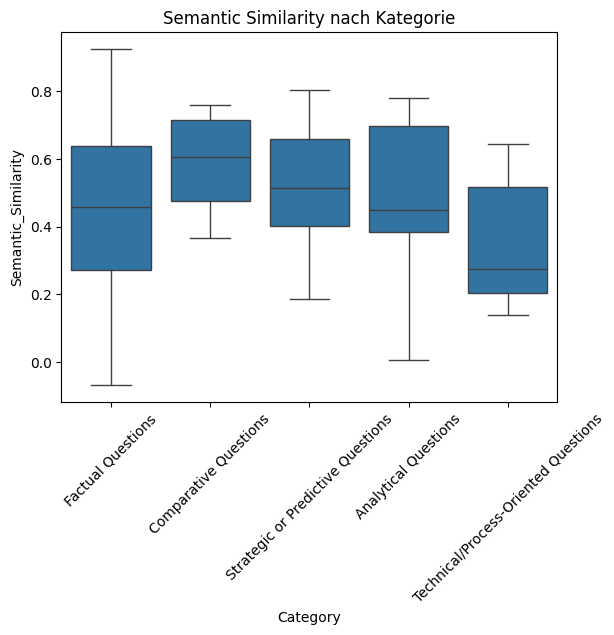

In [19]:
# Schritt 6: Gruppierte Übersicht
summary = df.groupby("Category")[["Semantic_Similarity", "Context_Relevance", "Faithfulness"]].mean().reset_index()

# Anzeige
print("Durchschnittliche Bewertung nach Kategorie:")
print(summary)

sns.boxplot(data=df, x="Category", y="Semantic_Similarity")
plt.xticks(rotation=45)
plt.title("Semantic Similarity nach Kategorie")
plt.show()

## Mothafacka

###  Install & Import Required Libraries

In [37]:
!pip install -U langchain langchain-community sentence-transformers faiss-cpu transformers --quiet

import os
import pandas as pd
from pathlib import Path
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.schema import Document
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, pipeline
from langchain_community.llms import HuggingFacePipeline
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

### Split Source Paragraphs into Chunks

The input paragraphs are split into overlapping chunks to improve retrieval granularity. Each chunk is stored as a Document object with basic metadata.

In [38]:
# Split long texts into chunks for retrieval
splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=50)
docs = []
for i, row in evaluation_data.iterrows():
    chunks = splitter.split_text(row["Paragraph"])
    for chunk in chunks:
        docs.append(Document(page_content=chunk, metadata={"source": f"sample-{i}"}))

### Embed Chunks and Build a FAISS Vector Store

In [39]:
# Load a lightweight embedding model from Hugging Face
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Create in-memory vectorstore
vectorstore = FAISS.from_documents(docs, embedding_model)
retriever = vectorstore.as_retriever()

Exception ignored in: <function _xla_gc_callback at 0x7ac5ae52ce00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


#alt

In [13]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS

# Load a lightweight embedding model from Hugging Face
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Create in-memory vectorstore
vectorstore = FAISS.from_documents(docs, embedding_model)
retriever = vectorstore.as_retriever()


<ipython-input-13-4c70a23a0099>:5: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### Define the Prompt Template

A custom prompt guides the language model to use only the retrieved context when generating answers, promoting groundedness.

In [ ]:
template = """You are a helpful assistant. Use the following context to answer the user's question.
If the answer is not in the context, say you don't know.

Context:
{context}

Question: {question}
Answer:"""
prompt = PromptTemplate.from_template(template)

### Load FLAN-T5 Model and Wrap in LangChain

The FLAN-T5 model is loaded locally and wrapped as a LangChain-compatible LLM using HuggingFacePipeline.

In [ ]:
model_name = "google/flan-t5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

pipe = pipeline("text2text-generation", model=model, tokenizer=tokenizer, max_new_tokens=512, device=0)
llm = HuggingFacePipeline(pipeline=pipe)

### Create the Retrieval-Augmented Generation Chain

A RetrievalQA pipeline is created by combining the retriever, prompt, and LLM. It also returns the context documents used.

In [ ]:
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever,
    chain_type_kwargs={"prompt": prompt},
    return_source_documents=True
)

### Generate Answers for All QA Pairs

For each question, the system retrieves context and generates an answer. The result, including the context and category, is stored in a DataFrame.

In [ ]:
predictions = []
for i, row in evaluation_data.iterrows():
    result = qa_chain.invoke({"query": row["Question"]})
    context = [doc.page_content for doc in result["source_documents"]]
    predictions.append({
        "question": row["Question"],
        "answer": result["result"],
        "contexts": context,
        "ground_truth": row["Answer"],
        "category": row["Category"]
    })

predictions_df = pd.DataFrame(predictions)

### Local Evaluation Using Cosine Similarity

The quality of generated answers is measured by computing the cosine similarity between model outputs and ground-truth answers using local embeddings.

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

sbert = SentenceTransformer("all-MiniLM-L6-v2")

pred_embeddings = sbert.encode(predictions_df["answer"].tolist(), convert_to_tensor=True).cpu().numpy()
gt_embeddings = sbert.encode(predictions_df["ground_truth"].tolist(), convert_to_tensor=True).cpu().numpy()

cosine_scores = cosine_similarity(pred_embeddings, gt_embeddings)
similarities = [cosine_scores[i, i] for i in range(len(cosine_scores))]

predictions_df["cosine_similarity"] = similarities

### Analyze Answer Quality by Category

Results are grouped by question category to assess model performance in each type, such as factual, comparative, or analytical questions.

In [ ]:
summary = predictions_df.groupby("category")["cosine_similarity"].agg(["mean", "median", "count"]).reset_index()
summary.rename(columns={"mean": "avg_similarity", "count": "num_questions"}, inplace=True)
print(summary)

### Visualize Results

This boxplot visualizes how answer similarity scores vary across different question categories, helping reveal strengths and weaknesses of the RAG system.

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=predictions_df, x="category", y="cosine_similarity")
plt.title("RAG Answer Quality by Question Category (Cosine Similarity)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# === 4. Prompt Template ===
template = """You are a helpful assistant. Use the following context to answer the user's question.
If the answer is not in the context, say you don't know.

Context:
{context}

Question: {question}
Answer:"""
prompt = PromptTemplate.from_template(template)

# === 5. Load FLAN-T5 Model (locally, via HuggingFace) ===
model_name = "google/flan-t5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

pipe = pipeline("text2text-generation", model=model, tokenizer=tokenizer, max_new_tokens=512, device=0)
llm = HuggingFacePipeline(pipeline=pipe)

# === 6. Build RAG QA Chain ===
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever,
    chain_type_kwargs={"prompt": prompt},
    return_source_documents=True
)

# === 7. Generate Answers ===
predictions = []
for i, row in evaluation_data.iterrows():
    result = qa_chain.invoke({"query": row["Question"]})
    context = [doc.page_content for doc in result["source_documents"]]
    predictions.append({
        "question": row["Question"],
        "answer": result["result"],
        "contexts": context,
        "ground_truth": row["Answer"],
        "category": row["Category"]
    })

predictions_df = pd.DataFrame(predictions)

Device set to use cuda:0


### Lokale Evaluation via Cosine Similarity

In [34]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Lade Sentence-BERT Modell
sbert = SentenceTransformer("all-MiniLM-L6-v2")

# Embeddings berechnen (auf CPU übertragen)
pred_embeddings = sbert.encode(predictions_df["answer"].tolist(), convert_to_tensor=True).cpu().numpy()
gt_embeddings = sbert.encode(predictions_df["ground_truth"].tolist(), convert_to_tensor=True).cpu().numpy()

# Cosine Similarity berechnen
cosine_scores = cosine_similarity(pred_embeddings, gt_embeddings)
similarities = [cosine_scores[i, i] for i in range(len(cosine_scores))]

# Zur DataFrame hinzufügen
predictions_df["cosine_similarity"] = similarities


### Analyse: Auswertung nach Kategorie

In [35]:
# Zusammenfassung pro Fragekategorie
summary = predictions_df.groupby("category")["cosine_similarity"].agg(["mean", "median", "count"]).reset_index()
summary.rename(columns={"mean": "avg_similarity", "count": "num_questions"}, inplace=True)
print(summary)


                               category  avg_similarity    median  \
0                  Analytical Questions        0.423605  0.418303   
1                 Comparative Questions        0.459312  0.522794   
2                     Factual Questions        0.421446  0.432492   
3     Strategic or Predictive Questions        0.450387  0.439147   
4  Technical/Process-Oriented Questions        0.379800  0.358123   

   num_questions  
0             16  
1              4  
2            184  
3             14  
4              7  


### Visualisierung

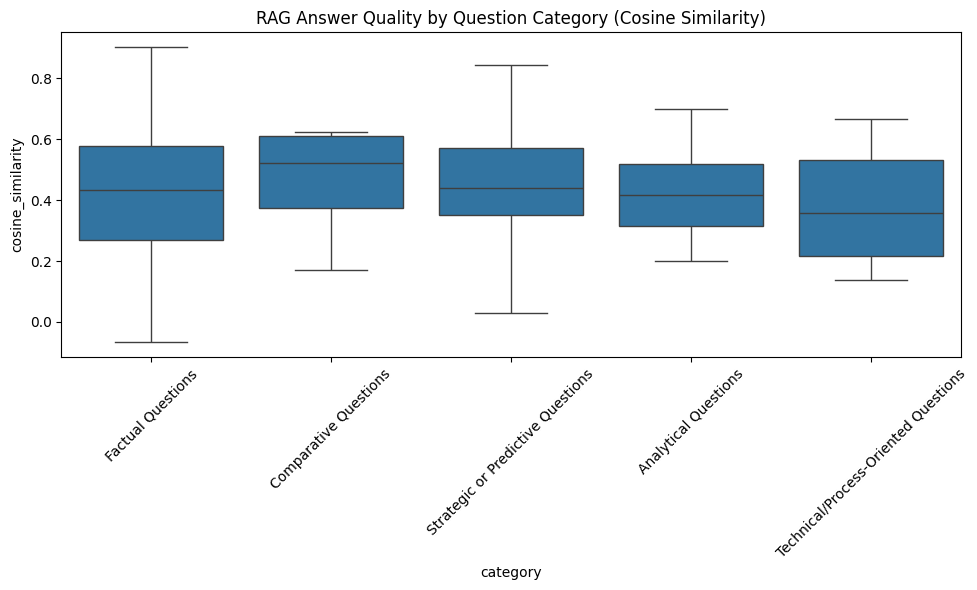

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=predictions_df, x="category", y="cosine_similarity")
plt.title("RAG Answer Quality by Question Category (Cosine Similarity)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##huer alt

### Build RAG Pipeline with FLAN-T5 and LangChain

In [18]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
from langchain_community.llms import HuggingFacePipeline
from transformers import pipeline

# Load tokenizer and model manually
model_name = "google/flan-t5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Use HuggingFace pipeline
pipe = pipeline(
    "text2text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=512,
    device=0  # or -1 for CPU
)

# Wrap with LangChain-compatible LLM
from langchain_core.language_models import LLM
llm = HuggingFacePipeline(pipeline=pipe)

Device set to use cuda:0


In [19]:
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever,
    chain_type_kwargs={"prompt": prompt},
    return_source_documents=True
)

### Generate Answers and Collect Source Contexts

In [21]:
# Run inference for each question using the RAG pipeline
predictions = []
for i, row in evaluation_data.iterrows():
    result = qa_chain.invoke({"query": row["Question"]})
    context = [doc.page_content for doc in result["source_documents"]]
    predictions.append({
        "question": row["Question"],
        "answer": result["result"],
        "contexts": context,
        "ground_truth": row["Answer"],
        "category": row["Category"]
    })

predictions_df = pd.DataFrame(predictions)
predictions_df.head()


,question,answer,contexts,ground_truth,category
0,How has XPeng's vehicle delivery performance e...,ev year year increase in December vehicle deli...,[ev year year increase in December vehicle del...,XPeng experienced a dramatic increase in vehic...,Factual Questions
1,What infrastructure growth has XPeng achieved ...,XPeng have a strong infrastructure growth in C...,[chinese automotive startup XPeng show one dra...,XPeng has rapidly expanded its infrastructure ...,Factual Questions
2,How does XPeng's growth compare to other elect...,XPeng deliver smart ev year year increase in D...,[chinese automotive startup XPeng show one dra...,"While XPeng is not directly compared to Tesla,...",Comparative Questions
3,What is Sinopec's role in the green hydrogen s...,lead player global energy stage,[Sinopec lay plan build large green hydrogen p...,Sinopec is actively entering the green hydroge...,Factual Questions
4,How does Sinopec plan to power its green hydro...,by using renewable energy,[Sinopec lay plan build large green hydrogen p...,Sinopec's project will be powered by a newly b...,Strategic or Predictive Questions
